# 1. 텐서플로(Tensorflow) 훑어보기

- 텐서플로 : 수치 계산용 라이브러리, 대규모 머신러닝에 잘 맞게 튜닝되어 있음
    - 핵심 구조는 넘파이와 비슷, GPU 지원
    - 분산 컴퓨팅 지원
    - JIT(Just-In-Time) 컴파일러 포함 → 빠른 속도, 메모리 사용량 감소, 계산 최적화
    - 계산 그래프 → 플랫폼 중립 포맷 배포 가능
    - 후진 모드 자동 미분, RMSProp, Nadam 등 고성능 옵티마이저 제공
    - 고수준 딥러닝 API : `tf.keras`
    - 저수준 딥러닝 API : `tf.nn`
    - 자동 미분 : `tf.GradientTape`
    - 선형 대수 및 신호 처리 수학 연산
        - `tf.math`
        - `tf.linalg`
        - `tf.signal`
        - `tf.random`
        - `tf.bitwise`
    - 입출력과 전처리
        - `tf.audio`
        - `tf.data`
        - `tf.image`
        - `tf.io`
        - `tf.queue`
    - 텐서보드 시각화 : `tf.summary`
    - 배포와 최적화
        - `tf.distribute`
        - `tf.saved_model`
        - `tf.autograph`
        - `tf.graph_util`
        - `tf.lite`
        - `tf.quantization`
        - `tf.tpu`
        - `tf.xla`
    - 특수한 데이터 구조
        - `tf.lookup`
        - `tf.nest`
        - `tf.ragged`
        - `tf.sets`
        - `tf.sparse`
        - `tf.strings`
    - 기타
        - `tf.experimental`
        - `tf.config`
- 저수준 텐서플로 연산 → 효율적인 C++ 코드로 작성, 커널 구현
- TFX(Tensorflow Extended) : 텐서플로 제품화를 위한 라이브러리
- 텐서플로 허브 : 사전 훈련된 신경망 재사용
- 텐서플로 모델 저장소 : 신경망 구조 다운로드
- 텐서플로 리소스 페이지 : 다양한 텐서플로 기반 프로젝트

# 2. 넘파이처럼 텐서플로 사용하기

## 1. 텐서와 연산

- `tf.constant` : 텐서 생성
- `tf.shape` : 크기
- `tf.dtype` : 데이터 타입
- 모든 기본 수학 연산 + 넘파이 연산 제공

## 2. 텐서와 넘파이

- 넘파이 배열 → 텐서, 텐서 → 넘파이 가능
- 넘파이 배열 → 텐서플로 연산 적용, 텐서 → 넘파이 연산 적용 가능

## 3. 타입 변환

- 텐서플로 → 어떤 타입 변환도 자동으로 수행하지 않음
- 호환되지 않는 타입의 텐서 연산 → 예외
- `tf.cast()`  : 타입 변환이 꼭 필요한 경우만 사용

## 4. 변수

- 일반적인 텐서 → 역전파로 변경되어야 하는 신경망의 가중치 구현 불가
- `tf.Variable` : `tf.Tensor` 와 비슷

## 5. 다른 데이터 구조

- `tf.SparseTensor` : 희소 텐서, 0으로 채워진 텐서
- `tf.sparse` : 희소 텐서를 위한 연산 제공
- `tf.TensorArray` : 텐서 배열, 텐서 리스트, 고정된 길이 but 동적으로 변경 가능
- `tf.RaggedTensor` : 래그드 텐서, 리스트, 텐서의 크기가 달라지는 것
- `tf.ragged` : 래그드 텐서를 위한 연산 제공
- `tf.string` : 문자열 탠서, 바이트 문자열
- 집합 : 일반적인 텐서 표현
- `tf.sets` : 집합 연산
- 큐 : 단계별로 텐서 저장
    - FIFOQueue
    - PriorityQueue
    - RandomShuffleQueue
    - PaddingFIFOQueue
- `tf.queue` : 큐 연산

# 3. 사용자 정의 모델과 훈련 알고리즘

## 1. 사용자 정의 손실 함수

- 후버 손실 함수 정의

## 2. 사용자 정의 요소를 가진 모델을 저장하고 로드하기

- 함수 이름, 실제 함수를 매핑한 딕셔너리 전달

## 3. 활성화 함수, 초기화, 규제, 제한을 커스터마이징하기

- 손실, 규제, 제한, 초기화, 지표, 활성화 함수, 층, 모델 등 → 커스터마이징 가능
- 적절한 입력과 출력을 가진 간단한 함수 작성

## 4. 사용자 정의 지표

- 손실 → 모델 훈련을 위해 경사 하강법에서 사용 → 미분 가능, 그레이디언트 0 아님
- 지표 → 모델 평가 시 사용, 이해하기 쉬워야 함, 미분 불가능, 그레이디언트 0 가능
- 스프리밍 지표(Streaming Metric) : 배치마다 점진적 업데이트

## 5. 사용자 정의 층

- 텐서플로에는 없는 특이한 층을 가진 네트워크 생성
- 동일한 층 블록이 여러 번 반복되는 네트워크 생성
- `tf.keras.layers.Lambda`  : 가중치가 없는 층 생성
- `tf.keras.layers.Layer` : 가중치를 가진 층 생성

## 6. 사용자 정의 모델

- `tf.keras.Model` : 생성자에서 층, 변수 생성, 작업 메서드 구현
- 모델 → 층처럼 정의 가능

## 7. 모델 구성 요소에 기반한 손실과 지표

- 규제, 모델 내부 상황 모니터링 유용
- 재구성 손실(Reconstruction Loss) : 보조 출력에 연결된 손실

## 8. 자동 미분으로 그레이디언트 계산하기

- 각 파라미터가 조금 바뀔 때마다 출력이 얼마나 변하는지 측정 → 도함수의 근사값 계산

## 9. 사용자 정의 훈련 반복

- 훈련 반복 및 의도 사항 확인 → 사용자 정의 훈련 반복

# 4. 텐서플로 함수(Tensorflow Function)와 그래프

## 1. 오토그래프와 트레이싱

- 오토그래프(Autograph) : 파이썬 함수의 소스 코드 분석 → 제어문 찾기
- 트레이싱(Tracing) : 심볼릭 텐서 → 매개변수 호출, 노드 → 연산, 화살표 → 텐서

## 2. 텐서플로 함수 사용법

- `@tf.function` 데코레이터 사용

In [2]:
import tensorflow as tf

t = tf.constant([[1., 2., 3.], [4., 5., 6.]])
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [3]:
t.shape

TensorShape([2, 3])

In [4]:
t.dtype

tf.float32

In [5]:
t[:, 1:]

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 3.],
       [5., 6.]], dtype=float32)>

In [6]:
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [7]:
t + 10

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [8]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [9]:
t @ tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [10]:
tf.constant(42)

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [11]:
import numpy as np

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [12]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [14]:
tf.square(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 4., 16., 25.])>

In [15]:
np.square(t)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)

In [16]:
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

In [17]:
tf.constant(2.) + tf.constant(40., dtype=tf.float64)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a double tensor [Op:AddV2] name: 

In [18]:
t2 = tf.constant(40., dtype=tf.float64)

In [19]:
tf.constant(2.0) + tf.cast(t2, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=42.0>

In [20]:
v = tf.Variable([[1., 2., 3.], [4., 5., 6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [22]:
v.assign(2 * v)
v[0, 1].assign(42)
v[:, 2].assign([0., 1.])
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[100.,  42.,   0.],
       [ 16.,  20., 200.]], dtype=float32)>

In [23]:
v[1] = [7., 8., 9.]

TypeError: 'ResourceVariable' object does not support item assignment

In [24]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

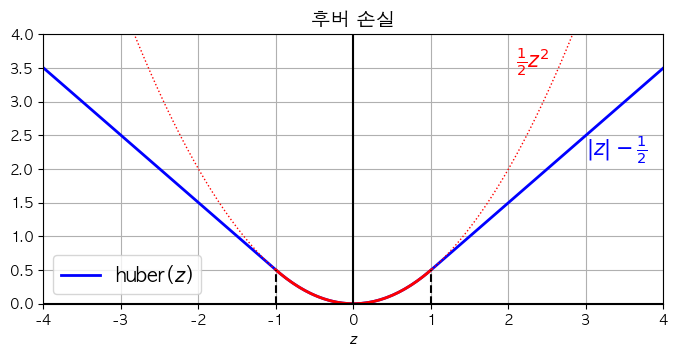

In [26]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("후버 손실", fontsize=14)
plt.show()

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target.reshape(-1, 1),
                                                              random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

input_shape = X_train.shape[1:]

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [29]:
model.fit(X_train_scaled, y_train, epochs=2, validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - loss: 0.7494 - mae: 1.1371 - val_loss: 0.3473 - val_mae: 0.6522
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.2607 - mae: 0.5681 - val_loss: 0.2552 - val_mae: 0.5383


In [33]:
model.save("my_model_with_a_custom_loss.keras")

In [35]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss.keras", custom_objects={"huber_fn": huber_fn})

/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 11 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [36]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss = threshold * tf.abs(error) - threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    return huber_fn

In [37]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_threshold_2.keras",
                                   custom_objects={"huber_fn": create_huber(2.0)})

ValueError: File not found: filepath=my_model_with_a_custom_loss_threshold_2.keras. Please ensure the file is an accessible `.keras` zip file.

In [38]:
class HuberLoss(tf.keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)

    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss = self.threshold * tf.abs(error) - self.threshold ** 2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [39]:
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [42]:
model = tf.keras.models.load_model("my_model_with_a_custom_loss_class.h5", custom_objects={"HuberLoss": HuberLoss})

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'my_model_with_a_custom_loss_class.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [43]:
def my_softplus(z):
    return tf.math.log(1.0 + tf.exp(z))


def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)


def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))


def my_positive_weights(weights):
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [44]:
layer = tf.keras.layers.Dense(1, activation=my_softplus,
                              kernel_initializer=my_glorot_initializer,
                              kernel_regularizer=my_l1_regularizer,
                              kernel_constraint=my_positive_weights)

In [45]:
class MyL1Regularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))

    def get_config(self):
        return {"factor": self.factor}

In [46]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", input_shape=input_shape),
    tf.keras.layers.Dense(1),
])

In [47]:
model.compile(loss="mse", optimizer="nadam", metrics=[create_huber(2.0)])

In [48]:
precision = tf.keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1])

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [49]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0])

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [50]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [51]:
precision.variables

[<KerasVariable shape=(1,), dtype=float32, path=precision/true_positives>,
 <KerasVariable shape=(1,), dtype=float32, path=precision/false_positives>]

In [52]:
precision.reset_states()

AttributeError: 'Precision' object has no attribute 'reset_states'

In [53]:
class HuberMetric(tf.keras.metrics.Metric):
    def __init__(self, threshold=1.0, **kwargs):
        super().__init__(**kwargs)
        self.threshold = threshold
        self.huber_fn = create_huber(threshold)
        self.total = self.add_weight("total", initializer="zeros")
        self.count = self.add_weight("count", initializer="zeros")

    def update_state(self, y_true, y_pred, sample_weight=None):
        sample_metrics = self.huber_fn(y_true, y_pred)
        self.total.assign_add(tf.reduce_sum(sample_metrics))
        self.count.assign_add(tf.cast(tf.size(y_true), tf.float32))

    def result(self):
        return self.total / self.count

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [54]:
exponential_layer = tf.keras.layers.Lambda(lambda x: tf.exp(x))

In [55]:
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", input_shape=input_shape),
    tf.keras.layers.Dense(1),
    exponential_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))
model.evaluate(X_test_scaled, y_test)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 1.2350 - val_loss: 0.4392
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - loss: 0.6130 - val_loss: 0.4047
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.5172 - val_loss: 0.3941
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 343us/step - loss: 0.4498 - val_loss: 0.3698
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 348us/step - loss: 0.5446 - val_loss: 0.3770
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step - loss: 0.3924


0.3943728804588318

In [56]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, units, activation=None, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, batch_input_shape):
        self.kernel = self.add_weight(name="kernel", shape=[batch_input_shape[-1], self.units], initializer="he_normal")
        self.bias = self.add_weight(name="bias", shape=[self.units], initializer="zeros")

    def call(self, X):
        return self.activation(X @ self.kernel + self.bias)

    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "units": self.units, "activation": tf.keras.activations.serialize(self.activation)}

In [57]:
class MyMultiLayer(tf.keras.layers.Layer):
    def call(self, X):
        X1, X2 = X
        print("X1.shape : ", X1.shape, " X2.shape : ", X2.shape)
        return X1 + X2, X1 * X2, X1 / X2

In [58]:
class MyGaussianNoise(tf.keras.layers.Layer):
    def __init__(self, stddev, **kwargs):
        super().__init__(**kwargs)
        self.stddev = stddev

    def call(self, X, training=None):
        if training:
            noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
            return X + noise
        else:
            return X

    def compute_output_shape(self, batch_input_shape):
        return batch_input_shape

In [59]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu", kernel_initializer="he_normal") for _ in
                       range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z

In [60]:
class ResidualRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal")
        self.block1 = ResidualBlock(2, 30)
        self.block2 = ResidualBlock(2, 30)
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, inputs):
        Z = self.hidden1(inputs)
        for _ in range(1 + 3):
            Z = self.block1(Z)
        Z = self.block2(Z)
        return self.out(Z)

In [61]:
class ReconstructingRegressor(tf.keras.Model):
    def __init__(self, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal") for _ in range(5)]
        self.out = tf.keras.layers.Dense(output_dim)
        self.reconstruction_mean = tf.keras.metrics.Mean(name="reconstruction_error")

    def build(self, batch_input_shape):
        n_inputs = batch_input_shape[-1]
        self.reconstruct = tf.keras.layers.Dense(n_inputs)
        self.built = True

    def call(self, inputs, training=None):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        reconstruction = self.reconstruct(Z)
        recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
        self.add_loss(0.05 * recon_loss)
        if training:
            result = self.reconstruction_mean(recon_loss)
            self.add_metric(result)
        return self.out(Z)

In [63]:
def f(w1, w2):
    return 3 * w1 ** 2 + 2 * w1 * w2

In [64]:
w1, w2 = 5, 3
eps = 1e-6
(f(w1 + eps, w2) - f(w1, w2)) / eps

36.000003007075065

In [65]:
(f(w1, w2 + eps) - f(w1, w2)) / eps

10.000000003174137

In [66]:
w1, w2 = tf.Variable(5.), tf.Variable(3.)
with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [67]:
gradients

[<tf.Tensor: shape=(), dtype=float32, numpy=36.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0>]

In [68]:
with tf.GradientTape() as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
try:
    dz_dw2 = tape.gradient(z, w2)
except RuntimeError as ex:
    print(ex)

A non-persistent GradientTape can only be used to compute one set of gradients (or jacobians)


In [69]:
with tf.GradientTape(persistent=True) as tape:
    z = f(w1, w2)

dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape

In [70]:
c1, c2 = tf.constant(5.), tf.constant(3.)
with tf.GradientTape() as tape:
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [71]:
with tf.GradientTape() as tape:
    tape.watch(c1)
    tape.watch(c2)
    z = f(c1, c2)

gradients = tape.gradient(z, [c1, c2])

In [72]:
def f(w1, w2):
    return 3 * w1 ** 2 + tf.stop_gradient(2 * w1 * w2)


with tf.GradientTape() as tape:
    z = f(w1, w2)

gradients = tape.gradient(z, [w1, w2])

In [73]:
x = tf.Variable(1e-50)
with tf.GradientTape() as tape:
    z = tf.sqrt(x)

tape.gradient(z, [x])

[<tf.Tensor: shape=(), dtype=float32, numpy=inf>]

In [74]:
def my_softplus(z):
    return tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)

In [75]:
@tf.custom_gradient
def my_softplus(z):
    def my_softplus_gradients(grads):
        return grads * (1 - 1 / (1 + tf.exp(z)))

    result = tf.math.log(1 + tf.exp(-tf.abs(z))) + tf.maximum(0., z)
    return result, my_softplus_gradients

In [76]:
tf.keras.utils.set_random_seed(42)
l2_reg = tf.keras.regularizers.l2(0.05)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal", kernel_regularizer=l2_reg),
    tf.keras.layers.Dense(1, kernel_regularizer=l2_reg)
])

In [77]:
def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

In [78]:
def print_status_bar(step, total, loss, metrics=None):
    metrics = " - ".join([f"{m.name}: {m.result():.4f}" for m in [loss] + (metrics or [])])
    end = "" if step < total else "\n"
    print(f"\r{step}/{total} - " + metrics, end=end)

In [79]:
n_epochs = 5
batch_size = 32
n_steps = len(X_train) // batch_size
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.MeanAbsoluteError()]

In [80]:
for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}")
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train_scaled, y_train)
        with tf.GradientTape() as tape:
            y_pred = model(X_batch, training=True)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        for variable in model.variables:
            if variable.constraint is not None:
                variable.assign(variable.constraint(variable))

        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)

        print_status_bar(step, n_steps, mean_loss, metrics)

    for metric in [mean_loss] + metrics:
        metric.reset_states()

Epoch 1/5
362/362 - mean: 3.5419 - mean_absolute_error: 0.6640


AttributeError: 'Mean' object has no attribute 'reset_states'

In [81]:
def cube(x):
    return x ** 3

In [82]:
cube(2)

8

In [83]:
cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [84]:
tf_cube = tf.function(cube)
tf_cube

In [85]:
tf_cube(2)

<tf.Tensor: shape=(), dtype=int32, numpy=8>

In [86]:
tf_cube(tf.constant(2.0))

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

In [87]:
@tf.function
def tf_cube(x):
    return x ** 3

In [88]:
class MyMomentumOptimizer(tf.keras.optimizers.Optimizer):
    def __init__(self, learning_rate=0.001, momentum=0.0, name="MyMomentumOptimizer", **kwargs):
        super().__init__(name, **kwargs)
        self._learning_rate = self._build_learning_rate(learning_rate)
        self.momentum = momentum

    def build(self, var_list):
        super().build(var_list)
        if hasattr(self, "_built") and self._built:
            return
        self.momentums = []
        for var in var_list:
            self.momentums.append(
                self.add_variable_from_reference(
                    model_variable=var, variable_name="m"
                )
            )
        self._built = True

    def update_step(self, gradient, variable):
        lr = tf.cast(self.learning_rate, variable.dtype)
        m = None
        var_key = self._var_key(variable)
        momentum = tf.cast(self.momentum, variable.dtype)
        m = self.momentums[self._index_dict[var_key]]

        if isinstance(gradient, tf.IndexedSlices):
            add_value = tf.IndexedSlices(-gradient.values * lr, gradient.indices)
            if m is not None:
                m.assign(m * momentum)
                m.scatter_add(add_value)
                variable.assign_add(m)
            else:
                variable.scatter_add(add_value)
        else:
            if m is not None:
                m.assign(-gradient * lr + m * momentum)
                variable.assign_add(m)
            else:
                variable.assign_add(-gradient * lr)

    def get_config(self):
        base_config = super().get_config()
        return {
            **base_config,
            "learning_rate": self._serialize_hyperparameter(self._learning_rate),
            "momentum": self._serialize_hyperparameter(self.momentum),
        }

In [89]:
optimizer = MyMomentumOptimizer()

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=optimizer)
model.fit(X_train_scaled, y_train, epochs=5)

ValueError: Argument `learning_rate` should be float, or an instance of LearningRateSchedule, or a callable (that takes in the current iteration value and returns the corresponding learning rate value). Received instead: learning_rate=MyMomentumOptimizer

In [90]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential([tf.keras.layers.Dense(1, input_shape=[8])])
model.compile(loss="mse", optimizer=optimizer)
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - loss: 2.4885
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - loss: 0.6421
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - loss: 0.6275
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 239us/step - loss: 0.6047
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step - loss: 0.6121
